# interferómetro de Mach-Zehnder

## setup

![](Mach-Zehnder-setup.png)

donde:

- **BS1 y BS2**: Divisores de haz (*beam splitters*) semirreflectantes (50% transmisión, 50% reflexión)
- **M1 y M2**: Espejos 100% reflectantes
- **PS**: Cambiador de fase (*phase shifter*)
- **D0 y D1**: Detectores de fotones


$$\text{BS} = \frac{1}{\sqrt{2}}\left[\begin{array}{cc}1 & i \\ i & 1\end{array}\right]$$
$$\text{PS}(\Delta) = \left[\begin{array}{cc}1 & 0 \\ 0 & e^{i\Delta}\end{array}\right]$$

In [6]:
# globales
corridas=1000

In [2]:
import qiskit as qk
import numpy as np
import sympy as sp

# Configurar sympy para mejor visualización
sp.init_printing()

# Definir matrices simbólicas (para visualización)
## Beam splitter
BS = (1/sp.sqrt(2)) * sp.Matrix([[1, sp.I], [sp.I, 1]])
display(" Beam splitter:",BS)

## Phase shifter 
PS= lambda Delta: sp.Matrix([[1, 0], [0, sp.exp(sp.I * Delta)]])

for delta_val, delta_name in [(0, "0"), (sp.pi/2, "π/2"), (sp.pi/4, "π/4")]:
    display(f"Phase shifter , PS(Delta={delta_name}):")
    ps = PS(Delta=delta_val)
    display(sp.simplify(ps))

# Versiones numpy (para usar en Qiskit)
#BS = (1/np.sqrt(2)) * np.array([[1, 1j], [1j, 1]])
#PS = lambda Delta: np.array([[1, 0], [0, np.exp(1j*Delta)]])
print()
#BS = sp.lambdify((sp.pi,),BS,"numpy")
BS = np.array(BS).astype(np.complex128)
print()
#PS = lambda Delta: np.array([[1, 0], [0, np.exp(1j*Delta)]])

' Beam splitter:'

⎡ √2   √2⋅ⅈ⎤
⎢ ──   ────⎥
⎢ 2     2  ⎥
⎢          ⎥
⎢√2⋅ⅈ   √2 ⎥
⎢────   ── ⎥
⎣ 2     2  ⎦

'Phase shifter , PS(Delta=0):'

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

'Phase shifter , PS(Delta=π/2):'

⎡1  0⎤
⎢    ⎥
⎣0  ⅈ⎦

'Phase shifter , PS(Delta=π/4):'

⎡1   0  ⎤
⎢       ⎥
⎢    ⅈ⋅π⎥
⎢    ───⎥
⎢     4 ⎥
⎣0  ℯ   ⎦

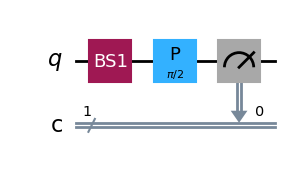

In [28]:
#for Delta in 0,np.pi/2,np.pi/4,:
Delta = np.pi/2

# Crear circuito
mz = qk.QuantumCircuit(1,1)
mz.unitary(BS, 0, label='BS1')
mz.p(Delta, 0)  # Phase gate , nativa de Qiskit (no usamos la definida antes)
#mz.unitary(BS, 0, label='BS2')

mz_copy=mz.copy()
mz_copy.measure(0,0)
display(mz_copy.draw(output='mpl'))

'Resultados de medición:'

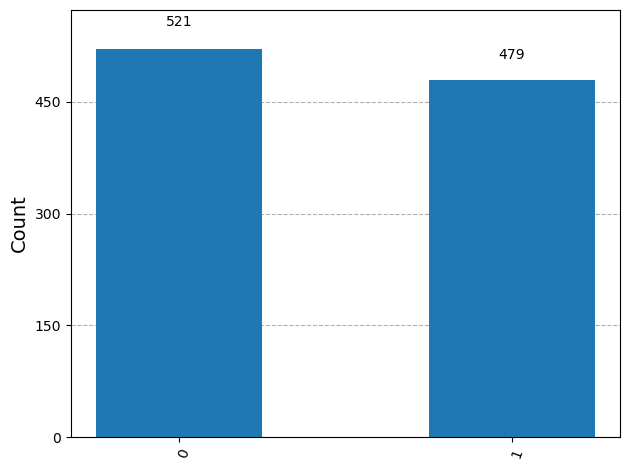

In [29]:
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

# Ejecutar el circuito con el sampler
sampler = StatevectorSampler()
job = sampler.run([mz_copy], shots=corridas)
result = job.result()

# Obtener los conteos
counts = result[0].data.c.get_counts()

# Mostrar histograma
display("Resultados de medición:")
display(plot_histogram(counts))